In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('GPU'))

2025-05-25 17:31:55.953105: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 17:31:55.962732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748161915.972286    1126 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748161915.975287    1126 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748161915.983917    1126 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version: 2.19.0
Is GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import os
import zipfile

local_zip = './tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

In [3]:
#폴더 경로 지정
base_dir = './tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

#Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

#Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


# 소규모 데이터셋을 이용해 처음부터 새로운 모델 훈련하기

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/user/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748161918.796521    1126 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5529 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [8]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary',
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary',
)

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print('배치 데이터 크기: ', data_batch.shape)
    print('배치 레이블 크기: ', labels_batch.shape)
    break

배치 데이터 크기:  (20, 150, 150, 3)
배치 레이블 크기:  (20, 1)


In [10]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
)

Epoch 1/30


I0000 00:00:1748161921.032278    1187 service.cc:152] XLA service 0x7efe8800aba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748161921.032322    1187 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2025-05-25 17:32:01.121025: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748161921.271464    1187 cuda_dnn.cc:529] Loaded cuDNN version 91001


 10/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.5034 - loss: 0.7048

I0000 00:00:1748161923.077110    1187 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.4832 - loss: 0.6979 - val_acc: 0.5500 - val_loss: 0.6827
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.5734 - loss: 0.6810 - val_acc: 0.6050 - val_loss: 0.6641
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.5876 - loss: 0.6673 - val_acc: 0.5810 - val_loss: 0.6669
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ -5s -48024us/step - acc: 0.6202 - loss: 0.6491 - val_acc: 0.5820 - val_loss: 0.6638
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.6629 - loss: 0.6217 - val_acc: 0.6250 - val_loss: 0.6556
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.7050 - loss: 0.5889 - val_acc: 0.6740 - val_loss: 0.6146
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7290 - loss: 0.5556 - val_acc: 0.6970 - val_loss: 0.5686
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.7355 - loss: 0.5339 - val_acc: 0.6900 - val_loss: 0.5958
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step -

In [11]:
model.save('cats_and_dogs_small_1.h5')

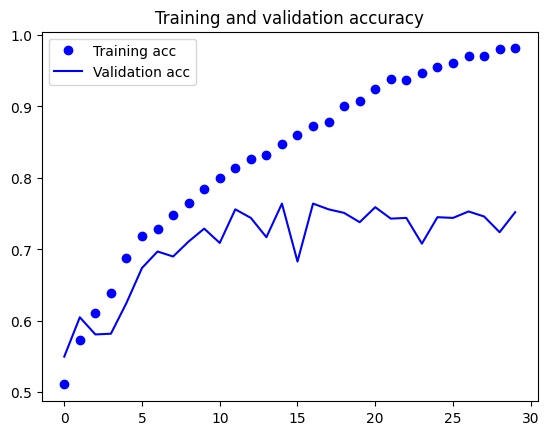

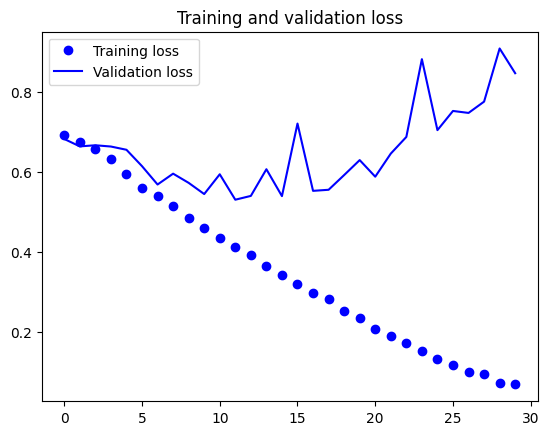

In [12]:
# 결과 시각화
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 데이터 증식을 포함하여 모델 훈련하기

In [13]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# 1. ImageDataGenerator 로 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=40, # 이미지를 랜덤하게 40도 회전
    width_shift_range=0.2, # 가로 방향으로 최대 20%만큼 랜덤 이동
    height_shift_range=0.2, # 세로 방향으로 최대 20%만큼 랜덤 이동
    shear_range=0.2, #이미지 기울임 정도
    zoom_range=0.2, # 확대, 축소 범위 80~120% 설정
    horizontal_flip=True, #이미지 좌우반전
    fill_mode='nearest') # 이미지 증강 후 생기는 빈 공간을 가장 가까운 픽셀로 채움

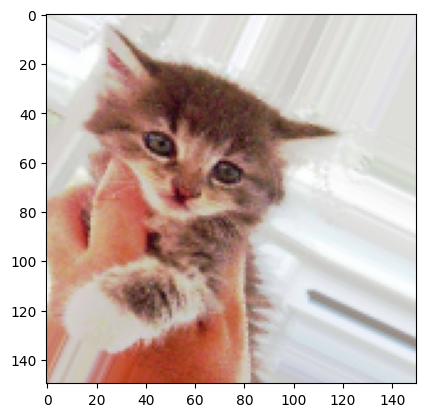

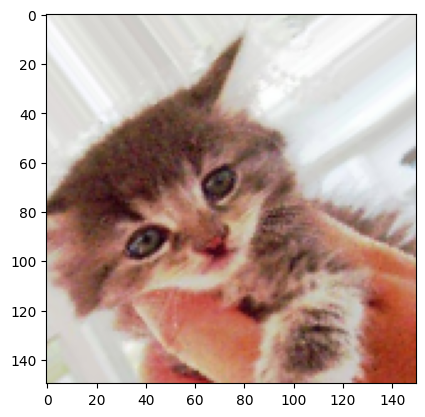

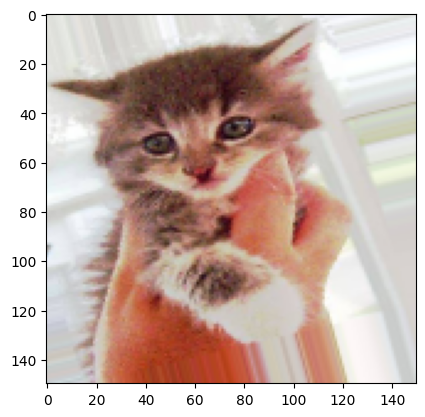

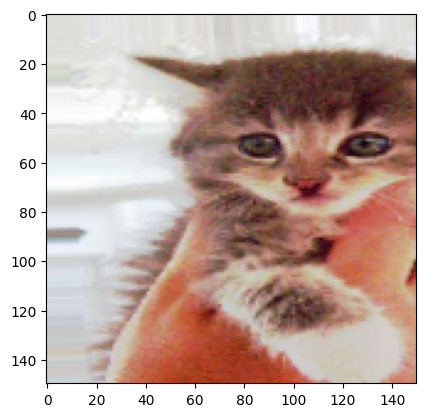

In [15]:
# 특정 샘플에 대한 데이터 증강 결과 확인
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # (150,150,3) 크기의 넘파이 배열
x = x.reshape((1,) + x.shape) # (1,150,150,3)으로 변환

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [16]:
# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


/home/user/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 데이터 증강을 위한 imageDataGenerator 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터를 위한 imageDataGenerator로, 증강 없이 전처리만 수행
test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 증강 수행
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 함
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# 모델 훈련
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/home/user/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 63/100 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - acc: 0.4933 - loss: 0.6950

/home/user/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - acc: 0.4967 - loss: 0.6946 - val_acc: 0.5000 - val_loss: 0.6897
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - acc: 0.5325 - loss: 0.6893 - val_acc: 0.4990 - val_loss: 0.6862
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.5303 - loss: 0.6876 - val_acc: 0.5940 - val_loss: 0.6696
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.5732 - loss: 0.6774 - val_acc: 0.5880 - val_loss: 0.6583
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.5419 - loss: 0.6812 - val_acc: 0.5980 - val_loss: 0.6570
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.5983 - loss: 0.6634 - val_acc: 0.6100 - val_loss: 0.6528
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.5642 - loss: 0.6685 - val_acc: 0.6250 - val_loss: 0.6425
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.5981 - loss: 0.6625 - val_acc: 0.6000 - val_loss: 0.6554
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/st

In [18]:
model.save('cats_and_dogs_small_2.h5')

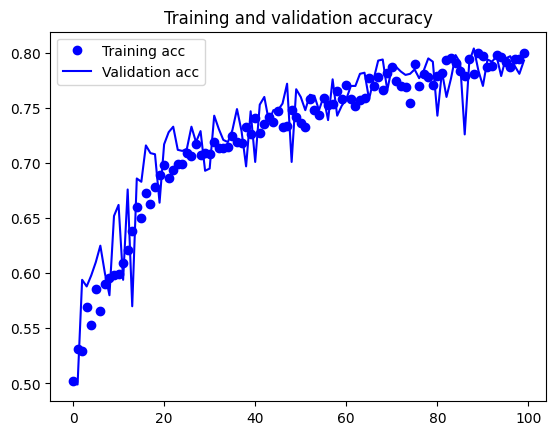

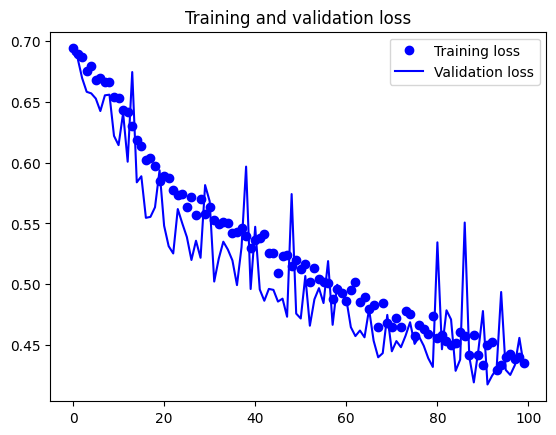

In [19]:
# 결과 확인
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 사전 훈련된 모델 사용하기

## 특성 추출

In [20]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # 모델 초기화를 위한 가중치 체크포인트
                  include_top=False, # 모델의 최상위 fully connected classifier 포함여부
                  input_shape=(150, 150, 3)) # 이미지의 크기


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [21]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import os
import numpy as np

# 특징 추출 함수 정의
def extract_features(directory, sample_count):

  # 특징 추출 후 결과 저장 공간 초기화
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    batch_size=24

  # 이미지 제너레이터 설정
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # 사전 훈련 모델에 predict()를 이용해 이미지 통과시켜 특징 추출

        # 추출된 특성, 레이블 저장
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

2025-05-25 17:45:45.260051: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng33{k2=15,k6=2,k13=0,k14=0,k22=0} for conv %cudnn-conv-bias-activation.49 = (f32[8,512,9,9]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,512,9,9]{3,2,1,0} %bitcast.541, f32[512,512,3,3]{3,2,1,0} %bitcast.548, f32[512]{0} %bitcast.550), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="vgg16_1/block5_conv1_1/convolution" source_file="/home/user/.local/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-05-25 17:45:45.261362: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 5.725335

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Found 1000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━

In [24]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [25]:
from keras import models
from keras import layers
from keras import optimizers

# classifier 부분 모델 네트워크 설정
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels, # 추출한 특성들을 input으로 사용
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/home/user/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5798 - loss: 8.2222 - val_acc: 0.7980 - val_loss: 1.8284
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7732 - loss: 3.1057 - val_acc: 0.8570 - val_loss: 1.2762
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8046 - loss: 2.4785 - val_acc: 0.8570 - val_loss: 1.1250
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8440 - loss: 1.7585 - val_acc: 0.8730 - val_loss: 0.9950
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8589 - loss: 1.3713 - val_acc: 0.8800 - val_loss: 0.8954
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8793 - loss: 0.9774 - val_acc: 0.8860 - val_loss: 0.8347
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9065 - loss: 0.8090 - val_acc: 0.8880 - val_loss: 0.7889
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ -0s -59747us/step - acc: 0.9088 - loss: 0.7587 - val_acc: 0.8890 - val_loss: 0.7473
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.

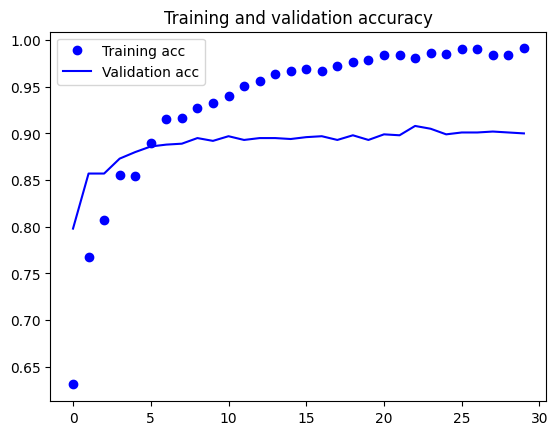

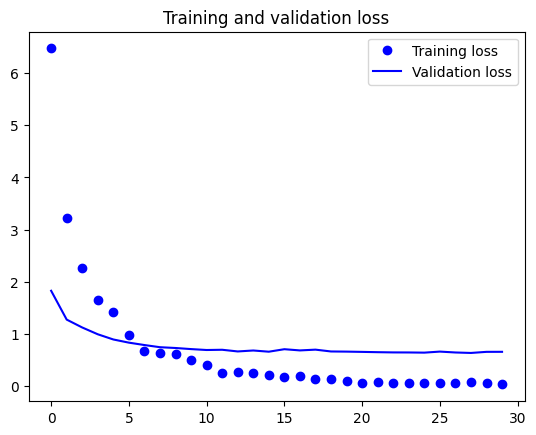

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base) # 내부에 VGG16 추가
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:',
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [30]:
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:',
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DataGenerator 정의
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 전처리, 증강 수행
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# 모델 컴파일 및 훈련 수행
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 9s - 87ms/step - acc: 0.7260 - loss: 0.5520 - val_acc: 0.8350 - val_loss: 0.4251
Epoch 2/30
100/100 - 6s - 58ms/step - acc: 0.8330 - loss: 0.4215 - val_acc: 0.8560 - val_loss: 0.3499
Epoch 3/30
100/100 - 6s - 58ms/step - acc: 0.8565 - loss: 0.3594 - val_acc: 0.8620 - val_loss: 0.3131
Epoch 4/30
100/100 - 6s - 58ms/step - acc: 0.8730 - loss: 0.3263 - val_acc: 0.8760 - val_loss: 0.3012
Epoch 5/30
100/100 - 6s - 59ms/step - acc: 0.8765 - loss: 0.3076 - val_acc: 0.8740 - val_loss: 0.2805
Epoch 6/30
100/100 - 6s - 58ms/step - acc: 0.8745 - loss: 0.2910 - val_acc: 0.8770 - val_loss: 0.2776
Epoch 7/30
100/100 - 5s - 53ms/step - acc: 0.8850 - loss: 0.2811 - val_acc: 0.8800 - val_loss: 0.2675
Epoch 8/30
100/100 - 6s - 59ms/step - acc: 0.8905 - loss: 0.2727 - val_acc: 0.8810 - val_loss: 0.2641
Epoch 9/30
100/100 - 6s - 59ms/step - acc: 0.9060 - loss: 0.2575 - val_acc: 0.8840 - val_loss: 0.257

In [32]:
model.save('cats_and_dogs_small_3.h5')

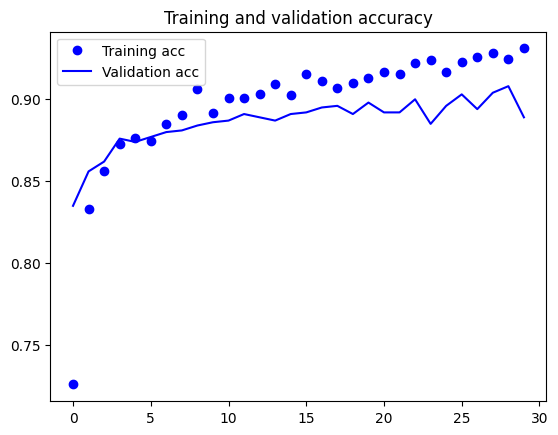

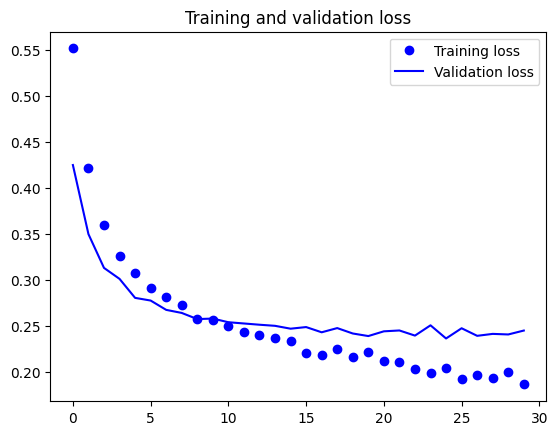

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 미세조정

In [34]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1': # blck5_conv1 부터 trainable하게 설정
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - acc: 0.9238 - loss: 0.1974 - val_acc: 0.9160 - val_loss: 0.2290
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - acc: 0.9300 - loss: 0.1701 - val_acc: 0.9320 - val_loss: 0.2198
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - acc: 0.9471 - loss: 0.1367 - val_acc: 0.9140 - val_loss: 0.2550
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ -1s -14027us/step - acc: 0.9584 - loss: 0.1143 - val_acc: 0.9280 - val_loss: 0.1995
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.9619 - loss: 0.1040 - val_acc: 0.9330 - val_loss: 0.2064
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - acc: 0.9692 - loss: 0.0920 - val_acc: 0.9210 - val_loss: 0.2597
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - acc: 0.9658 - loss: 0.0928 - val_acc: 0.9420 - val_loss: 0.1890
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc: 0.9691 - loss: 0.0771 - val_acc: 0.9360 - val_loss: 0.2092
Epoch 9/100
100/100 ━━━━━━━━━━━

In [37]:
model.save('cats_and_dogs_small_4.h5')

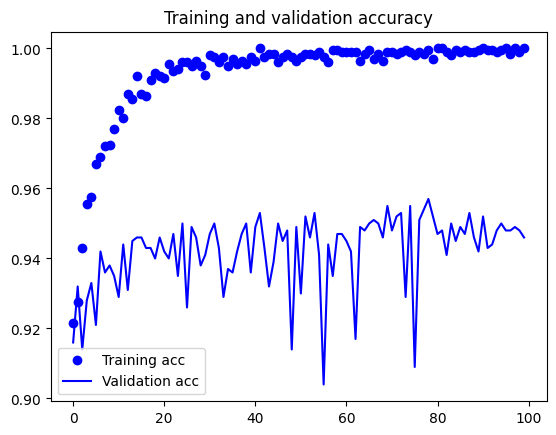

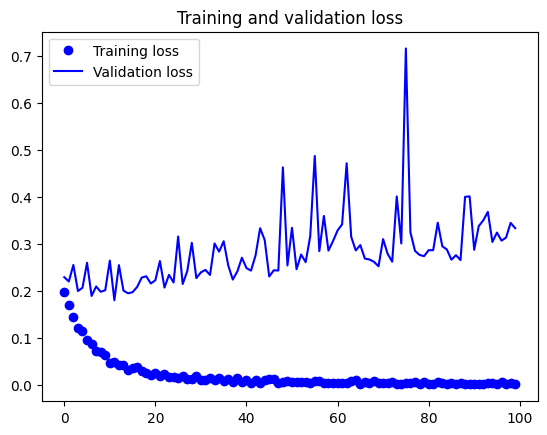

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()